In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# read in data
data = pd.read_csv('../data/phishing_email.csv')

# Split into train and test sets
X = data["text_combined"]
Y = data["label"]

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y,
    test_size=0.2,
    stratify=Y,
    random_state=42
)

print("Training data shape: ", X_train.shape)
print("Testing data shape: ", X_test.shape)

Training data shape:  (65988,)
Testing data shape:  (16498,)


In [3]:
# define linear SVM model
svm = LinearSVC(C=1.0,
    class_weight="balanced",
    max_iter=5000,
    random_state=42)

# define the TF-IDF vectorizer
tfidf = TfidfVectorizer(
    analyzer="char",
    ngram_range=(3, 5),
    min_df=5,
    max_df=0.9
)

In [ ]:
# create the pipeline
pipeline = Pipeline([
    ("tfidf", tfidf),
    ("clf", svm)
])

In [5]:
pipeline.fit(X_train, Y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('tfidf', ...), ('clf', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"input input: {'filename', 'file', 'content'}, default='content'- If `'filename'`, the sequence passed as an argument to fit is expected to be a list of filenames that need reading to fetch the raw content to analyze.- If `'file'`, the sequence items must have a 'read' method (file-like object) that is called to fetch the bytes in memory.- If `'content'`, the input is expected to be a sequence of items that can be of type string or byte.",'content'
,"encoding encoding: str, default='utf-8'If bytes or files are given to analyze, this encoding is used todecode.",'utf-8'
,"decode_error decode_error: {'strict', 'ignore', 'replace'}, default='strict'Instruction on what to do if a byte sequence is given to analyze thatcontains characters not of the given `encoding`. By default, it is'strict', meaning that a UnicodeDecodeError will be raised. Othervalues are 'ignore' and 'replace'.",'strict'
,"strip_accents strip_accents: {'ascii', 'unicode'} or callable, default=NoneRemove accents and perform other character normalizationduring the preprocessing step.'ascii' is a fast method that only works on characters that havea direct ASCII mapping.'unicode' is a slightly slower method that works on any characters.None (default) means no character normalization is performed.Both 'ascii' and 'unicode' use NFKD normalization from:func:`unicodedata.normalize`.",None
,"lowercase lowercase: bool, default=TrueConvert all characters to lowercase before tokenizing.",True
,"preprocessor preprocessor: callable, default=NoneOverride the preprocessing (string transformation) stage whilepreserving the tokenizing and n-grams generation steps.Only applies if ``analyzer`` is not callable.",None
,"tokenizer tokenizer: callable, default=NoneOverride the string tokenization step while preserving thepreprocessing and n-grams generation steps.Only applies if ``analyzer == 'word'``.",None


In [ ]:
# use pipeline to make predictions
y_pred = pipeline.predict(X_test)

In [9]:
# get decision function scores (distance to the hyperplane)
y_scores = pipeline.decision_function(X_test)

In [14]:
# calculate performance metrics
print(classification_report(Y_test, y_pred, digits=4))

# calculate ROC AUC score
roc_auc = roc_auc_score(Y_test, y_scores)
print("ROC-AUC:", roc_auc)

              precision    recall  f1-score   support

           0     0.9919    0.9893    0.9906      7919
           1     0.9901    0.9925    0.9913      8579

    accuracy                         0.9910     16498
   macro avg     0.9910    0.9909    0.9910     16498
weighted avg     0.9910    0.9910    0.9910     16498

ROC-AUC: 0.9995457415823499


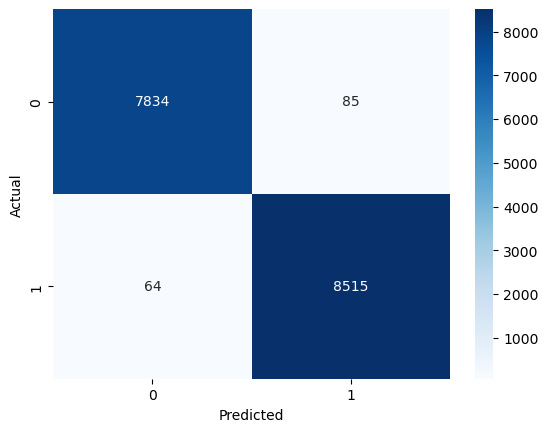

In [22]:
# generate confusion matrix
cm = confusion_matrix(Y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [21]:
import joblib

joblib.dump(pipeline, "models/linear_svm_phishing_model.joblib")

['models/linear_svm_phishing_model.joblib']